In [26]:
import os
from src.utils import getFilepath
from src.task_1_crate_distribution import *
import pandas as pd
filepath = getFilepath("orders.csv")


raw_df = load_csv_to_dataframe(filepath)
raw_df.head()

,order_id,date,company_id,company_name,crate_type,contact_data,salesowners
0,f47ac10b-58cc-4372-a567-0e02b2c3d479,29.01.22,1e2b47e6-499e-41c6-91d3-09d12dddfbbd,Fresh Fruits Co,Plastic,"[{ ""contact_name"":""Curtis"", ""contact_surname"":""Jackson"", ""city"":""Chicago"", ""cp"": ""12345""}]","Leonard Cohen, Luke Skywalker, Ammy Winehouse"
1,f47ac10b-58cc-4372-a567-0e02b2c3d480,21.02.22,0f05a8f1-2bdf-4be7-8c82-4c9b58f04898,Veggies Inc,Wood,"[{ ""contact_name"":""Maria"", ""contact_surname"":""Theresa"", ""city"":""Calcutta""}]","Luke Skywalker, David Goliat, Leon Leonov"
2,f47ac10b-58cc-4372-a567-0e02b2c3d481,03.04.22,1e2b47e6-499e-41c6-91d3-09d12dddfbbd,Fresh Fruits c.o,Metal,"[{ ""contact_name"":""Para"", ""contact_surname"":""Cetamol"", ""city"":""Frankfurt am Oder"", ""cp"": 3934}]",Luke Skywalker
3,f47ac10b-58cc-4372-a567-0e02b2c3d482,14.07.21,1c4b0b50-1d5d-463a-b56e-1a6fd3aeb7d6,Seafood Supplier,Plastic,NaN,"David Goliat, Leonard Cohen"
4,f47ac10b-58cc-4372-a567-0e02b2c3d483,23.10.22,34538e39-cd2e-4641-8d24-3c94146e6f16,Meat Packers Ltd,Plastic,NaN,"Chris Pratt, David Henderson, Marianov Merschik, Leon Leonov"


In [27]:
# Create the processed dataframe with the aggregation.
processed_df = calculate_crate_distribution(raw_df)
processed_df.head()

crate_type,Metal,Plastic,Wood
company_name,,,
Farm Fresh Co,1,0,0
Farm Fresh Ltd,0,1,0
Farms Global Co,1,0,0
Fresh Berries Inc,0,1,0
Fresh Farms Ltd,0,0,1


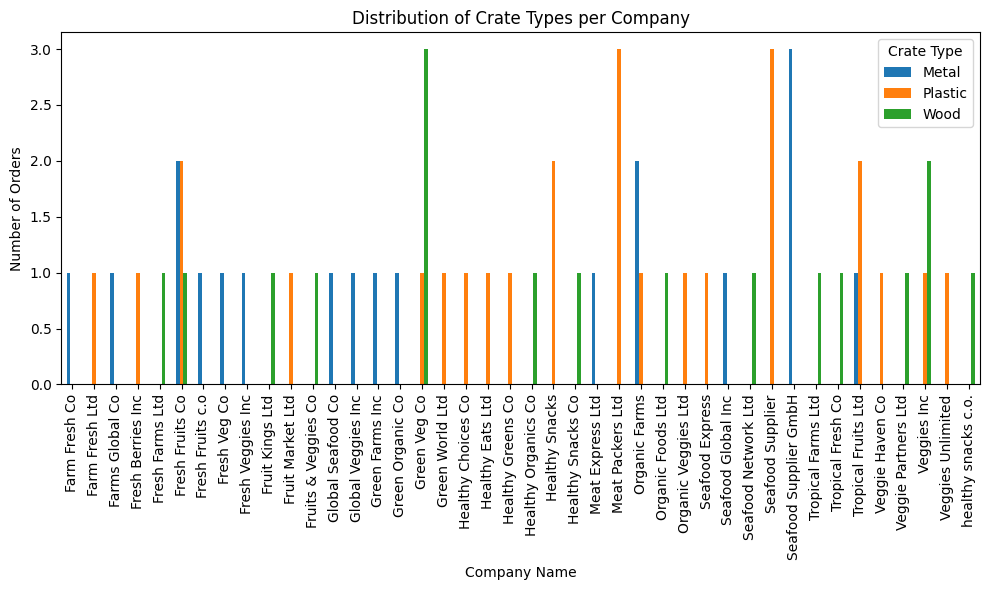

In [28]:
# Call the plot function with the DataFrame
bar_plot_df(processed_df)

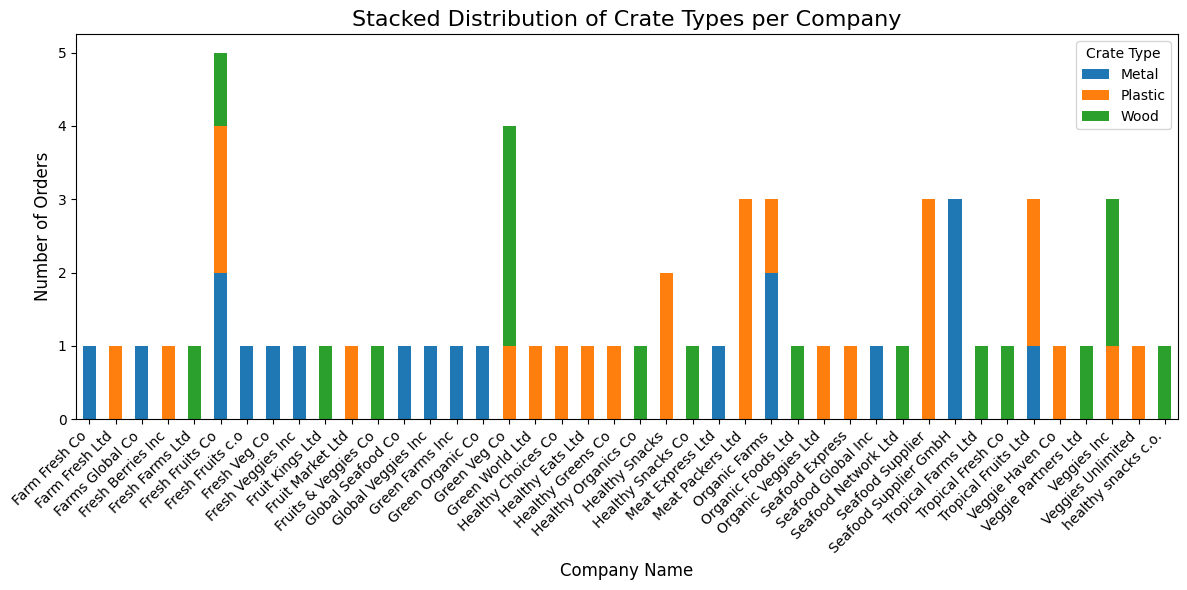

In [37]:
processed_df.plot(kind='bar', stacked=True, figsize=(12, 6),
                         color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Stacked Distribution of Crate Types per Company", fontsize=16)
plt.xlabel("Company Name", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend(title="Crate Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

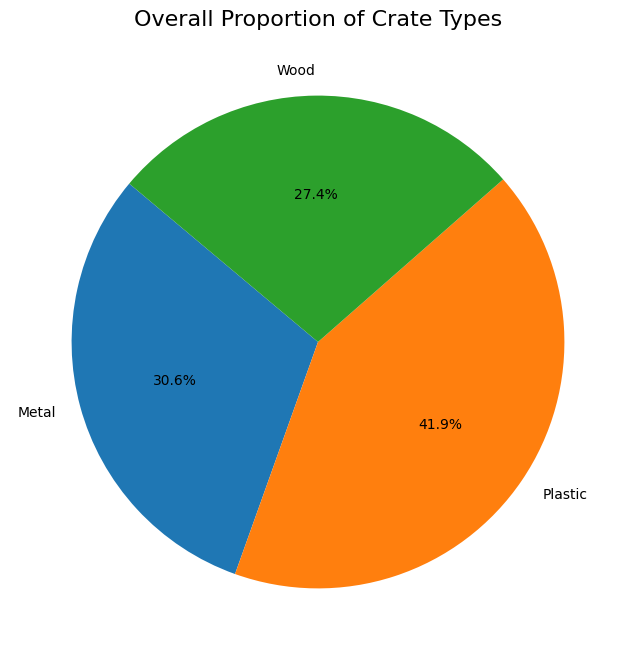

In [39]:
# Sum crate types across all companies
crate_totals = processed_df.sum()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(crate_totals, labels=crate_totals.index, autopct='%1.1f%%', startangle=140,
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Overall Proportion of Crate Types", fontsize=16)
plt.show()